In [1]:
import matplotlib.pyplot as plt
import numpy as np
import qutip as qt
import scipy

# Test 3: Two Level Qubit, 1 Bus Resonator Mode

##### Relevant Unit Conversions
$10^9hz=1ghz, 1s=10^9 ns, 1s=10^6\mu s$

In [3]:
π = np.pi
µs_to_ns = 1e3

### States
$|g\rangle=(1,0)^T$, $|e\rangle=(0,1)^T$

$|g,g,0\rangle=(1,0,0,0,0,0,0,0)^T$, $|e,g,1\rangle=(0,0,0,0,0,1,0,0)^T$

In [4]:
num_states = 2

g_state = qt.basis(num_states, 0)
e_state = qt.basis(num_states, 1)

psi0 = qt.tensor(e_state, g_state, e_state)
psi0

### Operators
$a,a^\dagger,  b, b^\dagger,  c, c^\dagger$

In [4]:
a = qt.tensor(qt.destroy(2), qt.qeye(2), qt.qeye(2))
adag = a.dag() 
b = qt.tensor(qt.qeye(2), qt.destroy(2), qt.qeye(2))
bdag = b.dag() 
c = qt.tensor(qt.qeye(2), qt.qeye(2), qt.destroy(2))
cdag = c.dag()


ggg_proj = qt.tensor(g_state, g_state, g_state).proj()
geg_proj = qt.tensor(g_state, e_state, g_state).proj()
egg_proj = qt.tensor(e_state, g_state, g_state).proj()
eeg_proj = qt.tensor(e_state, e_state, g_state).proj()
gge_proj = qt.tensor(g_state, g_state, e_state).proj()
gee_proj = qt.tensor(g_state, e_state, e_state).proj()
ege_proj = qt.tensor(e_state, g_state, e_state).proj()
eee_proj = qt.tensor(e_state, e_state, e_state).proj()

### Hamiltonian
$H/\hbar = {\frac{\omega_1}{2} a^\dagger a + \frac{\omega_2}{2} b^\dagger b } + (\omega_r+\chi_1 a^\dagger a+\chi_2 b^\dagger b)c^\dagger c + J(b^\dagger a+a^\dagger b)$


In [5]:
def hamiltonian(omega_1, omega_2, omega_r, J_coupling, chi1, chi2):
    t1 = omega_1 / 2 * adag * a
    t2 = omega_2 / 2 * bdag * b
    t3 = J_coupling * ((adag * b) + (bdag * a))
    t4 = (omega_r + (chi1 * adag * a) + (chi2 * bdag * b)) * cdag * c
    return t1 + t2 + t3 + t4

### 3 Level Plotting Function

In [6]:
def plot(time_evolution_b):
    geg_pops = qt.expect(geg_proj, time_evolution_b.states)
    egg_pops = qt.expect(egg_proj, time_evolution_b.states)
    ggg_pops = qt.expect(ggg_proj, time_evolution_b.states)
    eeg_pops = qt.expect(eeg_proj, time_evolution_b.states)
    gee_pops = qt.expect(gee_proj, time_evolution_b.states)
    ege_pops = qt.expect(ege_proj, time_evolution_b.states)
    gge_pops = qt.expect(gge_proj, time_evolution_b.states)
    eee_pops = qt.expect(eee_proj, time_evolution_b.states)
    
    fig, ax = plt.subplots(tight_layout=True)
    ax.plot(t_vec * µs_to_ns, geg_pops, label="geg")
    ax.plot(t_vec * µs_to_ns, egg_pops, label="egg")
    ax.plot(t_vec * µs_to_ns, ggg_pops, label="ggg")
    ax.plot(t_vec * µs_to_ns, eeg_pops, label="eeg")
    ax.plot(t_vec * µs_to_ns, gee_pops, label="gee")
    ax.plot(t_vec * µs_to_ns, ege_pops, label="ege")
    ax.plot(t_vec * µs_to_ns, gge_pops, label="gge")
    ax.plot(t_vec * µs_to_ns, eee_pops, label="eee")

    ax.legend()
    ax.set_xlabel('Time, $t$ [ns]')
    ax.set_ylabel(r'Population, $P_{mn}$')
    ax.set_title('SWAP gate')

    plt.show()
    plt.close()

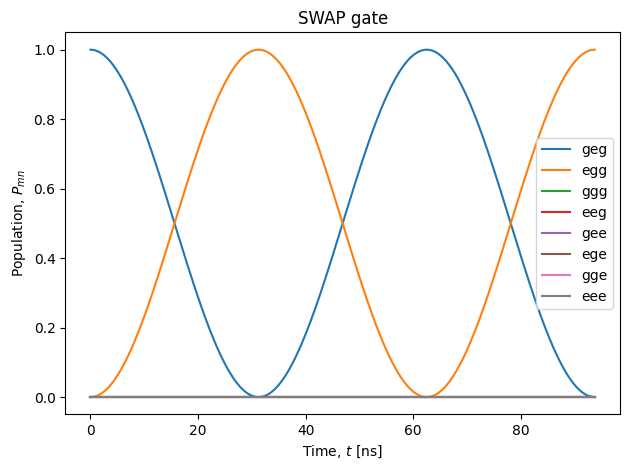

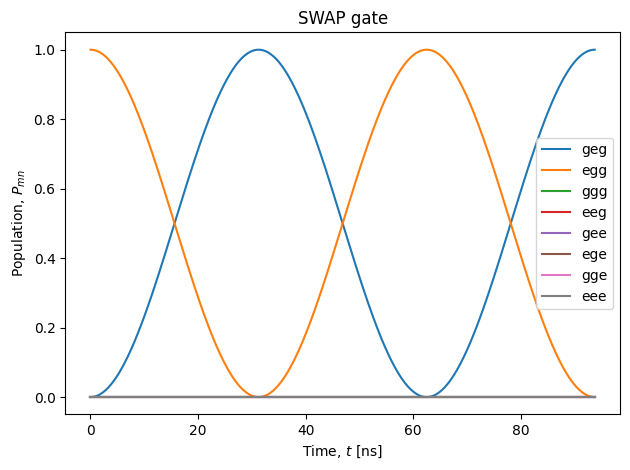

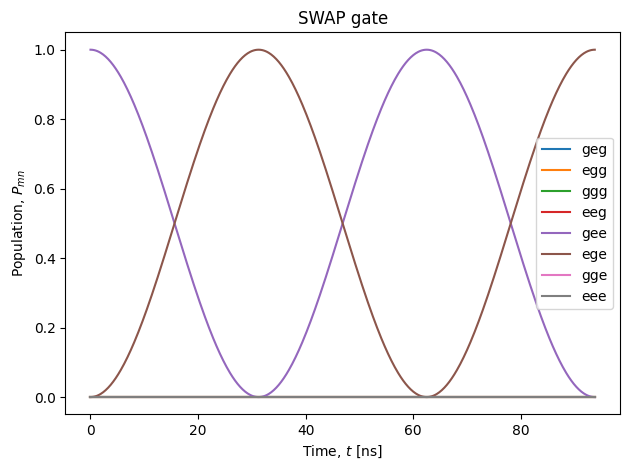

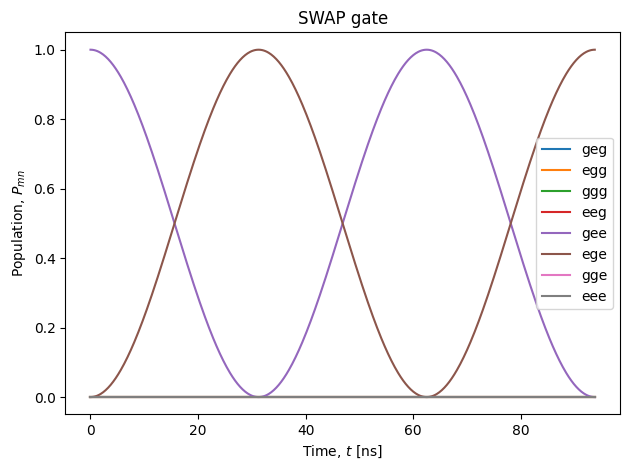

In [7]:
omega = 2*π * 6000
omegares = 2*π * 7000
J_coupling = 2*π * 8
chi = 2*π * 4 #(4mhz)
#alpha = 2*π * -300

h_ww_aa = hamiltonian(omega_1=omega, omega_2=omega, omega_r=omegares, J_coupling=J_coupling, chi1=chi, chi2=chi)

t_start = 0
t_end = 3 * π / (2 * J_coupling)
t_vec = np.linspace(t_start, t_end, 601)

psi1 = qt.tensor(g_state, e_state, g_state)
psi2 = qt.tensor(e_state, g_state, g_state)
psi3 = qt.tensor(g_state, e_state, e_state)
psi4 = qt.tensor(g_state, e_state, e_state)

time_evolution_1 = qt.mesolve(h_ww_aa, psi1, t_vec, [], [])
time_evolution_2 = qt.mesolve(h_ww_aa, psi2, t_vec, [], [])
time_evolution_3 = qt.mesolve(h_ww_aa, psi3, t_vec, [], [])
time_evolution_4 = qt.mesolve(h_ww_aa, psi4, t_vec, [], [])
_ = plot(time_evolution_1), plot(time_evolution_2), plot(time_evolution_3), plot(time_evolution_4)

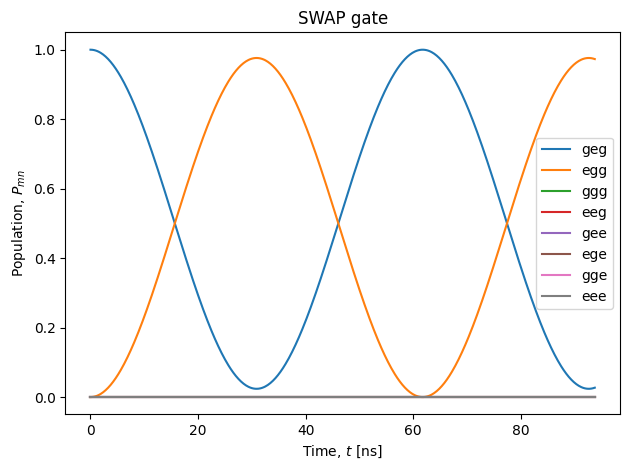

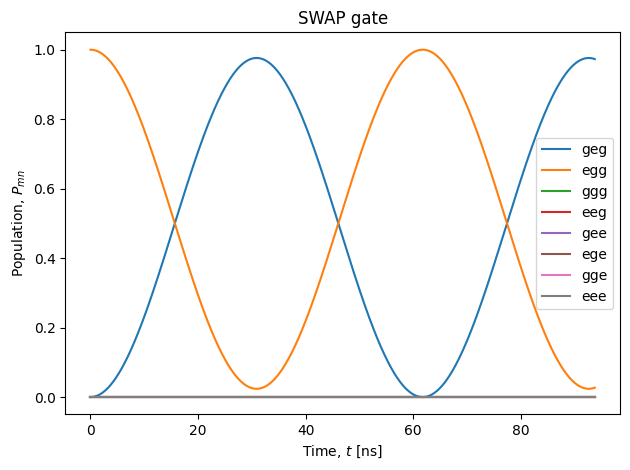

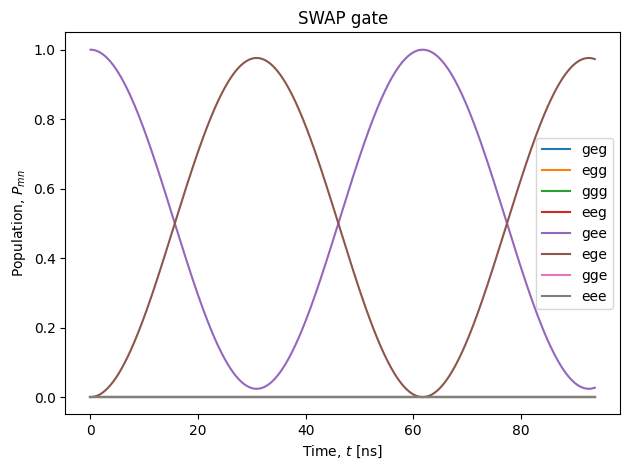

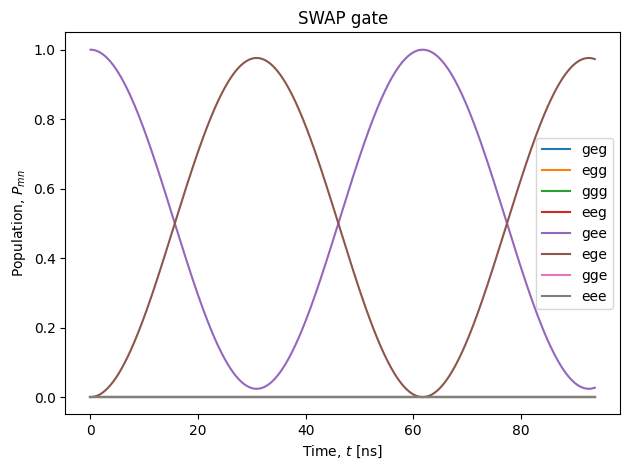

In [8]:
omega1 = 2*π * 6000
detuning = 5 # Mhz/2π
omega2 = omega1 - (2*π* detuning)
omegares = 2*π * 7000
J_coupling = 2*π * 8
chi = 2*π * 4 #(4mhz)
#alpha = 2*π * -300

h_ww_aa = hamiltonian(omega_1=omega1, omega_2=omega2, omega_r=omegares, J_coupling=J_coupling, chi1=chi, chi2=chi)

t_start = 0
t_end = 3 * π / (2 * J_coupling)
t_vec = np.linspace(t_start, t_end, 601)

psi1 = qt.tensor(g_state, e_state, g_state)
psi2 = qt.tensor(e_state, g_state, g_state)
psi3 = qt.tensor(g_state, e_state, e_state)
psi4 = qt.tensor(g_state, e_state, e_state)

time_evolution_1 = qt.mesolve(h_ww_aa, psi1, t_vec, [], [])
time_evolution_2 = qt.mesolve(h_ww_aa, psi2, t_vec, [], [])
time_evolution_3 = qt.mesolve(h_ww_aa, psi3, t_vec, [], [])
time_evolution_4 = qt.mesolve(h_ww_aa, psi4, t_vec, [], [])
_ = plot(time_evolution_1), plot(time_evolution_2), plot(time_evolution_3), plot(time_evolution_4)